In [1]:
options(jupyter.rich_display=FALSE)

# Problem 2: Polynomial fitting¶

Scoring: Each part is 10 points, 50 points total.

The file `data32.csv` has data stored in two columns, `x` and `y`. Your task is to fit several different models to the data: Linear, quadratic, and cubic.

**(A)** Write a function `readdata(path)` that reads the data file at the given path and returns a data frame with column names `"x"` and `"y"`. You can use the built-in `read.table()` function.

A *file path* is the location of a file in the filesystem. If your file is in the same directory as the script, the file name itself is sufficient. **Do not use the `setwd()` function.**

Example:

```r
> head(readdata("data32.csv"))
            x          y
1 -1,00000000 0,04353668
2 -0,73684211 0,37352346
3 -0,47368421 0,64151074
4 -0,21052632 0,79916821
5  0,05263158 0,99276747
6  0,31578947 0,78858108
```

In [5]:
readdata <- function(path) {
    read.table(path, header = T, sep=" ", dec=",")
}

data32 <- readdata("~/tests/assignments/2019_2020_2/data32.csv")
head(data32)

  x           y         
1 -1.00000000 0.04353668
2 -0.73684211 0.37352346
3 -0.47368421 0.64151074
4 -0.21052632 0.79916821
5  0.05263158 0.99276747
6  0.31578947 0.78858108

**(B)** We first try to fit a linear model to the data. That is, we assume $y = ax+b$.

Write a function named `linearmodel(df)` which takes a dataframe with columns `"x"` and `"y"` (like the one returned by `readdata()` above), and returns a string giving the formula with the parameters of the model, as shown below.

Example:

```r
> linearmodel(readdata("data32.csv"))
[1] "y = -0,416 x + 0,707"
```

- The coefficients should be rounded to three digits after the decimal point (use the `round()` function).
- To combine numbers and text into string, use the `paste()` function. Make sure there is a single space between numbers and symbols as shown (except for negative signs, which are part of the numbers).

In [15]:
linearmodel <- function(df) {
    res <- lm(y~x, df)
    paste("y =", round(res$coefficients[2], 3), "x +", round(res$coefficients[1], 3))
}

linearmodel(data32)

[1] "y = -0.416 x + 0.707"

**(C)** Now try a quadratic model, that is, assume $y=ax^2+bx+c$.

Write a function named `quadmodel(df)` which takes a dataframe with columns `"x"` and `"y"` (like the one returned by `readdata()` above), and returns a string giving the formula with the parameters of the model, as shown below.

Example:

```r
> quadmodel(readdata("data32.csv"))
[1] "y = -0,166 x^2 + 0,081 x + 0,715"
```

In [16]:
quadmodel <- function(df) {
    df <- cbind(x2=df$x^2, df)
    res <- lm(y~x+x2, df)
    paste("y =",
          round(res$coefficients[3], 3), "x^2 +",
          round(res$coefficients[2], 3), "x +",
          round(res$coefficients[1], 3))
}

quadmodel(data32)

[1] "y = -0.166 x^2 + 0.081 x + 0.715"

**(D)** Finally fit a cubic model, that is, assume $y=ax^3+bx^2+cx+d$..

Write a function named `cubicmodel(df)` which takes a dataframe with columns `"x"` and `"y"` (like the one returned by `readdata()` above), and returns a string giving the formula with the parameters of the model, as shown below.

Example:

```r
> cubicmodel(readdata("data32.csv"))
[1] "y = 0,103 x^3 + -0,63 x^2 + 0,351 x + 1,006"
```

In [18]:
cubicmodel <- function(df) {
    df <- cbind(x2=df$x^2, df)
    df <- cbind(x3=df$x^3, df)
    res <- lm(y~x+x2+x3, df)
    paste("y =",
          round(res$coefficients[4], 3), "x^3 +",
          round(res$coefficients[3], 3), "x^2 +",
          round(res$coefficients[2], 3), "x +",
          round(res$coefficients[1], 3))
}

cubicmodel(data32)

[1] "y = 0.103 x^3 + -0.63 x^2 + 0.351 x + 1.006"

**(E)** Generate a plot comparing the models' predictions with the data points.

Write a function `plotmodels(df)` which takes a dataframe with columns `"x"` and `"y"` (like the one returned by `readdata()` above) and generates a 2-by-2 plot as shown below. In each panel, the black dots are the data points and the colored lines are predictions of the model generated at the same x values.

```r
> plotmodels(readdata("data32.csv"))
```
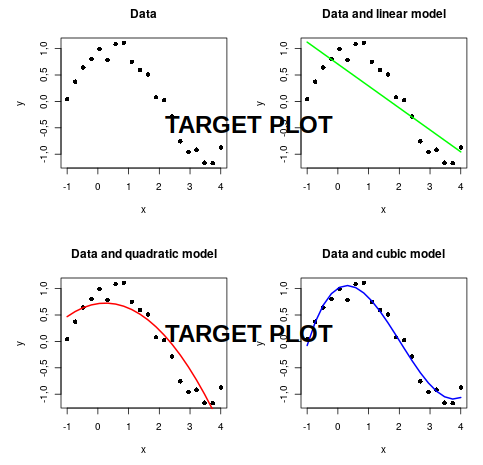

Replicate the plot with correct axis labels, colors, grid and legend. The aspect ratio (height/width) may vary. Set the line widths to 2. Do not add the text "TARGET PLOT". Upload the resulting image with the name `as3-2-E.png`. Note that you will not get any points if you do **not** submit the image file along with your code.

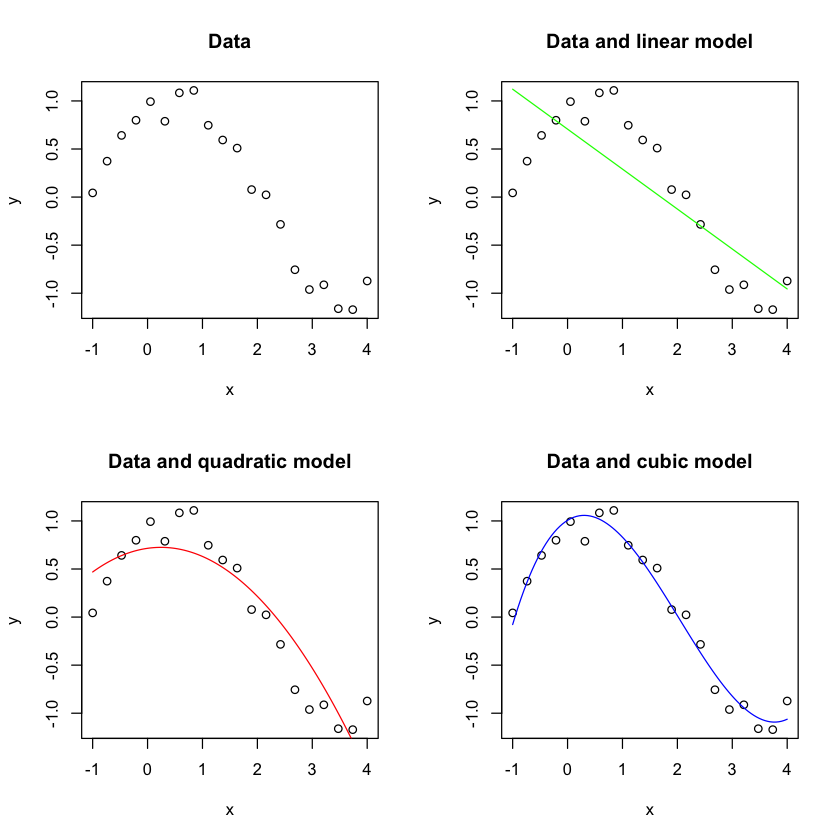

In [44]:
plot_models <- function(df) {
    par(mfrow=c(2,2))
    with(df, plot(x, y, main="Data"))
    
    with(df, plot(x, y, main="Data and linear model"))
    pred <- data.frame(x=seq(min(df$x), max(df$x), length.out = 100))
    pred$y <- predict.lm(lm(y~x, df), pred)
    lines(pred, col="green")
    
    df <- cbind(x2=df$x^2, df)
    with(df, plot(x, y, main="Data and quadratic model"))
    pred$x2 <- pred$x^2
    pred$y <- predict.lm(lm(y~x+x2, df), pred)
    lines(pred, col="red")
    
    df <- cbind(x3=df$x^3, df)
    with(df, plot(x, y, main="Data and cubic model"))
    pred$x3 <- pred$x^3
    pred$y <- predict.lm(lm(y~x+x2+x3, df), pred)
    lines(pred, col="blue")
}

plot_models(data32)